In [3]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('matchData.csv')

/var/folders/d4/_v_lx6gx66z8htqrwxr89lvc0000gn/T/ipykernel_35419/2527799519.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('matchData.csv')


In [ ]:
# Drop columns that are incomplete

for index, row in data.iterrows():
    if row[1] == 'partial':
        data.drop(index, inplace=True)

In [4]:
# export csv of just complete matches

data.to_csv('completeMatchData.csv', index=False)

In [12]:
data = pd.read_csv('completeMatchData.csv')
data

/var/folders/d4/_v_lx6gx66z8htqrwxr89lvc0000gn/T/ipykernel_63062/3540998528.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('completeMatchData.csv')


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,LOLTMNT99_132542,complete,NaN,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,...,207.0,1928.0,1127.0,3.0,4.0,4.0,1.0,1.0,1.0,3.0
1,LOLTMNT99_132542,complete,NaN,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,...,154.0,2943.0,1955.0,0.0,5.0,11.0,1.0,2.0,3.0,2.0
2,LOLTMNT99_132542,complete,NaN,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,...,190.0,660.0,2223.0,18.0,1.0,8.0,3.0,1.0,4.0,3.0
3,LOLTMNT99_132542,complete,NaN,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,...,170.0,5016.0,2473.0,64.0,8.0,7.0,1.0,1.0,4.0,5.0
4,LOLTMNT99_132542,complete,NaN,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,...,31.0,2194.0,3049.0,-6.0,2.0,17.0,1.0,2.0,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98911,LOLTMNT03_163999,complete,NaN,IC,2024,NaN,0,2024-11-11 18:36:23,3,14.21,...,204.0,2204.0,2957.0,44.0,5.0,10.0,3.0,3.0,7.0,5.0
98912,LOLTMNT03_163999,complete,NaN,IC,2024,NaN,0,2024-11-11 18:36:23,3,14.21,...,205.0,-137.0,1265.0,-23.0,6.0,9.0,5.0,4.0,6.0,4.0
98913,LOLTMNT03_163999,complete,NaN,IC,2024,NaN,0,2024-11-11 18:36:23,3,14.21,...,26.0,695.0,984.0,1.0,3.0,13.0,1.0,3.0,11.0,4.0
98914,LOLTMNT03_163999,complete,NaN,IC,2024,NaN,0,2024-11-11 18:36:23,3,14.21,...,711.0,-2156.0,-5817.0,14.0,17.0,37.0,21.0,21.0,45.0,17.0


In [29]:
# Get only games on patch 14.18

patchData = data[data['patch'] == 14.18]
patchData

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
86880,LOLTMNT02_166878,complete,NaN,AC,2024,NaN,1,2024-09-14 20:18:48,1,14.18,...,174.0,871.0,1043.0,48.0,2.0,1.0,3.0,3.0,2.0,1.0
86881,LOLTMNT02_166878,complete,NaN,AC,2024,NaN,1,2024-09-14 20:18:48,1,14.18,...,157.0,91.0,1551.0,52.0,2.0,8.0,2.0,4.0,5.0,1.0
86882,LOLTMNT02_166878,complete,NaN,AC,2024,NaN,1,2024-09-14 20:18:48,1,14.18,...,214.0,1837.0,768.0,52.0,2.0,4.0,2.0,3.0,3.0,2.0
86883,LOLTMNT02_166878,complete,NaN,AC,2024,NaN,1,2024-09-14 20:18:48,1,14.18,...,230.0,1578.0,-356.0,14.0,4.0,4.0,1.0,0.0,2.0,1.0
86884,LOLTMNT02_166878,complete,NaN,AC,2024,NaN,1,2024-09-14 20:18:48,1,14.18,...,22.0,534.0,213.0,12.0,0.0,10.0,2.0,0.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98875,LOLTMNT02_183092,complete,NaN,ESLOL,2024,BLX Masters,1,2024-11-10 21:34:28,5,14.18,...,211.0,1461.0,1923.0,3.0,2.0,8.0,1.0,3.0,3.0,3.0
98876,LOLTMNT02_183092,complete,NaN,ESLOL,2024,BLX Masters,1,2024-11-10 21:34:28,5,14.18,...,190.0,3392.0,670.0,15.0,9.0,5.0,3.0,2.0,2.0,2.0
98877,LOLTMNT02_183092,complete,NaN,ESLOL,2024,BLX Masters,1,2024-11-10 21:34:28,5,14.18,...,27.0,664.0,1686.0,10.0,2.0,10.0,2.0,1.0,6.0,6.0
98878,LOLTMNT02_183092,complete,NaN,ESLOL,2024,BLX Masters,1,2024-11-10 21:34:28,5,14.18,...,825.0,-7524.0,-7154.0,-72.0,8.0,20.0,16.0,16.0,33.0,8.0


In [30]:
patchData.to_csv('patchData.csv', index=False)

In [21]:
# get only rows with unique game ids

gamesData = patchData.drop_duplicates(subset='gameid')
gamesData.to_csv('uniqueGames.csv', index=False)

We have 727 games to work with here.

We need to build a version of the data with the relevant columns we need to predict game outcomes.

We want a version that is not one hot encoded since that is more readable, but also one that is for our prediction model to use

Main things we need to look at are gold, experience, as these statistics help players get stronger to take objectives and win the game. We will also look at early objectives taken like towers or dragons. 

- Match ID
- Blue Win (This is what will be tested)
- Blue Top Pick (One Hot Encoded)
- Blue Jng Pick (One Hot Encoded)
- Blue Mid Pick (One Hot Encoded)
- Blue Bot Pick (One Hot Encoded)
- Blue Sup Pick (One Hot Encoded)
- Red Top Pick (One Hot Encoded)
- Red Jng Pick (One Hot Encoded)
- Red Mid Pick (One Hot Encoded)
- Red Bot Pick (One Hot Encoded)
- Red Sup Pick (One Hot Encoded)
- Blue Top Gold At 10 Minutes
- Blue Jng Gold At 10 Minutes
- Blue Mid Gold At 10 Minutes
- Blue Bot Gold At 10 Minutes
- Blue Sup Gold At 10 Minutes
- Red Top Gold At 10 Minutes
- Red Jng Gold At 10 Minutes
- Red Mid Gold At 10 Minutes
- Red Bot Gold At 10 Minutes
- Red Sup Gold At 10 Minutes
- Blue Top XP At 10 Minutes
- Blue Jng XP At 10 Minutes
- Blue Mid XP At 10 Minutes
- Blue Bot XP At 10 Minutes
- Blue Sup XP At 10 Minutes
- Red Top XP At 10 Minutes
- Red Jng XP At 10 Minutes
- Red Mid XP At 10 Minutes
- Red Bot XP At 10 Minutes
- Red Sup XP At 10 Minutes
- Blue Turret Plates
- Red Turret Plates
- Blue First Turret
- Red First Turret
- Blue First Mid Turret
- Red First Mid Turret
- Blue Void Grubs
- Red Void Grubs
- Red First Dragon
- Blue First Dragon
- Red Herald
- Blue Herald
- Blue Top Gold At 15 Minutes
- Blue Jng Gold At 15 Minutes
- Blue Mid Gold At 15 Minutes
- Blue Bot Gold At 15 Minutes
- Blue Sup Gold At 15 Minutes
- Red Top Gold At 15 Minutes
- Red Jng Gold At 15 Minutes
- Red Mid Gold At 15 Minutes
- Red Bot Gold At 15 Minutes
- Red Sup Gold At 15 Minutes
- Blue Top XP At 15 Minutes
- Blue Jng XP At 15 Minutes
- Blue Mid XP At 15 Minutes
- Blue Bot XP At 15 Minutes
- Blue Sup XP At 15 Minutes
- Red Top XP At 15 Minutes
- Red Jng XP At 15 Minutes
- Red Mid XP At 15 Minutes
- Red Bot XP At 15 Minutes
- Red Sup XP At 15 Minutes

In [62]:
# Create a database and table for the unique games

conn = sqlite3.connect('games.db')
cur = conn.cursor()

# use ints for prediction model
cur.execute('DROP TABLE IF EXISTS MatchData')

cur.execute('''CREATE TABLE MatchData (
    MatchID VARCHAR(50),
    BlueWin INT,
    BlueTopPick VARCHAR(50),
    BlueJngPick VARCHAR(50),
    BlueMidPick VARCHAR(50),
    BlueBotPick VARCHAR(50),
    BlueSupPick VARCHAR(50),
    RedTopPick VARCHAR(50),
    RedJngPick VARCHAR(50),
    RedMidPick VARCHAR(50),
    RedBotPick VARCHAR(50),
    RedSupPick VARCHAR(50),
    BlueTopGoldAt10Minutes INT,
    BlueJngGoldAt10Minutes INT,
    BlueMidGoldAt10Minutes INT,
    BlueBotGoldAt10Minutes INT,
    BlueSupGoldAt10Minutes INT,
    RedTopGoldAt10Minutes INT,
    RedJngGoldAt10Minutes INT,
    RedMidGoldAt10Minutes INT,
    RedBotGoldAt10Minutes INT,
    RedSupGoldAt10Minutes INT,
    BlueTopXPAt10Minutes INT,
    BlueJngXPAt10Minutes INT,
    BlueMidXPAt10Minutes INT,
    BlueBotXPAt10Minutes INT,
    BlueSupXPAt10Minutes INT,
    RedTopXPAt10Minutes INT,
    RedJngXPAt10Minutes INT,
    RedMidXPAt10Minutes INT,
    RedBotXPAt10Minutes INT,
    RedSupXPAt10Minutes INT,
    BlueTurretPlates INT,
    RedTurretPlates INT,
    BlueFirstTurret INT,
    RedFirstTurret INT,
    BlueFirstMidTurret INT,
    RedFirstMidTurret INT,
    BlueVoidGrubs INT,
    RedVoidGrubs INT,
    RedFirstDragon INT,
    BlueFirstDragon INT,
    RedHerald INT,
    BlueHerald INT,
    BlueTopGoldAt15Minutes INT,
    BlueJngGoldAt15Minutes INT,
    BlueMidGoldAt15Minutes INT,
    BlueBotGoldAt15Minutes INT,
    BlueSupGoldAt15Minutes INT,
    RedTopGoldAt15Minutes INT,
    RedJngGoldAt15Minutes INT,
    RedMidGoldAt15Minutes INT,
    RedBotGoldAt15Minutes INT,
    RedSupGoldAt15Minutes INT,
    BlueTopXPAt15Minutes INT,
    BlueJngXPAt15Minutes INT,
    BlueMidXPAt15Minutes INT,
    BlueBotXPAt15Minutes INT,
    BlueSupXPAt15Minutes INT,
    RedTopXPAt15Minutes INT,
    RedJngXPAt15Minutes INT,
    RedMidXPAt15Minutes INT,
    RedBotXPAt15Minutes INT,
    RedSupXPAt15Minutes INT
)
''')

The above table cannot be used for the prediction model as it is not one hot encoded, it is purely for analysis purposes.

In [63]:
# General Match Info
match_id = 0
blue_win = 0

# Picks
blue_top_pick = ""
blue_jng_pick = ""
blue_mid_pick = ""
blue_bot_pick = ""
blue_sup_pick = ""

red_top_pick = ""
red_jng_pick = ""
red_mid_pick = ""
red_bot_pick = ""
red_sup_pick = ""

# Gold at 10 Minutes
blue_top_gold_at_10_minutes = 0
blue_jng_gold_at_10_minutes = 0
blue_mid_gold_at_10_minutes = 0
blue_bot_gold_at_10_minutes = 0
blue_sup_gold_at_10_minutes = 0

red_top_gold_at_10_minutes = 0
red_jng_gold_at_10_minutes = 0
red_mid_gold_at_10_minutes = 0
red_bot_gold_at_10_minutes = 0
red_sup_gold_at_10_minutes = 0

# XP at 10 Minutes
blue_top_xp_at_10_minutes = 0
blue_jng_xp_at_10_minutes = 0
blue_mid_xp_at_10_minutes = 0
blue_bot_xp_at_10_minutes = 0
blue_sup_xp_at_10_minutes = 0

red_top_xp_at_10_minutes = 0
red_jng_xp_at_10_minutes = 0
red_mid_xp_at_10_minutes = 0
red_bot_xp_at_10_minutes = 0
red_sup_xp_at_10_minutes = 0

# Turrets
blue_turret_plates = 0
red_turret_plates = 0
blue_first_turret = 0
red_first_turret = 0
blue_first_mid_turret = 0
red_first_mid_turret = 0

# Void Grubs
blue_void_grubs = 0
red_void_grubs = 0

# Objectives
red_first_dragon = 0
blue_first_dragon = 0
red_herald = 0
blue_herald = 0

# Gold at 15 Minutes
blue_top_gold_at_15_minutes = 0
blue_jng_gold_at_15_minutes = 0
blue_mid_gold_at_15_minutes = 0
blue_bot_gold_at_15_minutes = 0
blue_sup_gold_at_15_minutes = 0

red_top_gold_at_15_minutes = 0
red_jng_gold_at_15_minutes = 0
red_mid_gold_at_15_minutes = 0
red_bot_gold_at_15_minutes = 0
red_sup_gold_at_15_minutes = 0

# XP at 15 Minutes
blue_top_xp_at_15_minutes = 0
blue_jng_xp_at_15_minutes = 0
blue_mid_xp_at_15_minutes = 0
blue_bot_xp_at_15_minutes = 0
blue_sup_xp_at_15_minutes = 0

red_top_xp_at_15_minutes = 0
red_jng_xp_at_15_minutes = 0
red_mid_xp_at_15_minutes = 0
red_bot_xp_at_15_minutes = 0
red_sup_xp_at_15_minutes = 0

# 86892


for index, row in patchData.iterrows():
    curmatch_id = row['gameid']

    if curmatch_id != match_id:
        # new game to add to database
        if match_id != 0:
            # insert previous game into database
            cur.execute('''
                INSERT INTO MatchData (
                    MatchID, BlueWin, BlueTopPick, BlueJngPick, BlueMidPick, BlueBotPick, BlueSupPick,
                    RedTopPick, RedJngPick, RedMidPick, RedBotPick, RedSupPick,
                    BlueTopGoldAt10Minutes, BlueJngGoldAt10Minutes, BlueMidGoldAt10Minutes, BlueBotGoldAt10Minutes, BlueSupGoldAt10Minutes,
                    RedTopGoldAt10Minutes, RedJngGoldAt10Minutes, RedMidGoldAt10Minutes, RedBotGoldAt10Minutes, RedSupGoldAt10Minutes,
                    BlueTopXPAt10Minutes, BlueJngXPAt10Minutes, BlueMidXPAt10Minutes, BlueBotXPAt10Minutes, BlueSupXPAt10Minutes,
                    RedTopXPAt10Minutes, RedJngXPAt10Minutes, RedMidXPAt10Minutes, RedBotXPAt10Minutes, RedSupXPAt10Minutes,
                    BlueTurretPlates, RedTurretPlates, BlueFirstTurret, RedFirstTurret, BlueFirstMidTurret, RedFirstMidTurret,
                    BlueVoidGrubs, RedVoidGrubs, RedFirstDragon, BlueFirstDragon, RedHerald, BlueHerald,
                    BlueTopGoldAt15Minutes, BlueJngGoldAt15Minutes, BlueMidGoldAt15Minutes, BlueBotGoldAt15Minutes, BlueSupGoldAt15Minutes,
                    RedTopGoldAt15Minutes, RedJngGoldAt15Minutes, RedMidGoldAt15Minutes, RedBotGoldAt15Minutes, RedSupGoldAt15Minutes,
                    BlueTopXPAt15Minutes, BlueJngXPAt15Minutes, BlueMidXPAt15Minutes, BlueBotXPAt15Minutes, BlueSupXPAt15Minutes,
                    RedTopXPAt15Minutes, RedJngXPAt15Minutes, RedMidXPAt15Minutes, RedBotXPAt15Minutes, RedSupXPAt15Minutes
                ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
                ''', (match_id, blue_win, blue_top_pick, blue_jng_pick, blue_mid_pick, blue_bot_pick, blue_sup_pick,
                    red_top_pick, red_jng_pick, red_mid_pick, red_bot_pick, red_sup_pick,
                    blue_top_gold_at_10_minutes, blue_jng_gold_at_10_minutes, blue_mid_gold_at_10_minutes, blue_bot_gold_at_10_minutes, blue_sup_gold_at_10_minutes,
                    red_top_gold_at_10_minutes, red_jng_gold_at_10_minutes, red_mid_gold_at_10_minutes, red_bot_gold_at_10_minutes, red_sup_gold_at_10_minutes,
                    blue_top_xp_at_10_minutes, blue_jng_xp_at_10_minutes, blue_mid_xp_at_10_minutes, blue_bot_xp_at_10_minutes, blue_sup_xp_at_10_minutes,
                    red_top_xp_at_10_minutes, red_jng_xp_at_10_minutes, red_mid_xp_at_10_minutes, red_bot_xp_at_10_minutes, red_sup_xp_at_10_minutes,
                    blue_turret_plates, red_turret_plates, blue_first_turret, red_first_turret, blue_first_mid_turret, red_first_mid_turret,
                    blue_void_grubs, red_void_grubs, red_first_dragon, blue_first_dragon, red_herald, blue_herald,
                    blue_top_gold_at_15_minutes, blue_jng_gold_at_15_minutes, blue_mid_gold_at_15_minutes, blue_bot_gold_at_15_minutes, blue_sup_gold_at_15_minutes,
                    red_top_gold_at_15_minutes, red_jng_gold_at_15_minutes, red_mid_gold_at_15_minutes, red_bot_gold_at_15_minutes, red_sup_gold_at_15_minutes,
                    blue_top_xp_at_15_minutes, blue_jng_xp_at_15_minutes, blue_mid_xp_at_15_minutes, blue_bot_xp_at_15_minutes, blue_sup_xp_at_15_minutes,
                    red_top_xp_at_15_minutes, red_jng_xp_at_15_minutes, red_mid_xp_at_15_minutes, red_bot_xp_at_15_minutes, red_sup_xp_at_15_minutes))
            conn.commit()

        match_id = curmatch_id


    if row['side'] == 'Blue':
        if row['position'] == 'top':
            blue_top_pick = row['champion']
            blue_top_gold_at_10_minutes = row['goldat10']
            blue_top_xp_at_10_minutes = row['xpat10']
            blue_top_gold_at_15_minutes = row['goldat15']
            blue_top_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'jng':
            blue_jng_pick = row['champion']
            blue_jng_gold_at_10_minutes = row['goldat10']
            blue_jng_xp_at_10_minutes = row['xpat10']
            blue_jng_gold_at_15_minutes = row['goldat15']
            blue_jng_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'mid':
            blue_mid_pick = row['champion']
            blue_mid_gold_at_10_minutes = row['goldat10']
            blue_mid_xp_at_10_minutes = row['xpat10']
            blue_mid_gold_at_15_minutes = row['goldat15']
            blue_mid_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'bot':
            blue_bot_pick = row['champion']
            blue_bot_gold_at_10_minutes = row['goldat10']
            blue_bot_xp_at_10_minutes = row['xpat10']
            blue_bot_gold_at_15_minutes = row['goldat15']
            blue_bot_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'sup':
            blue_sup_pick = row['champion']
            blue_sup_gold_at_10_minutes = row['goldat10']
            blue_sup_xp_at_10_minutes = row['xpat10']
            blue_sup_gold_at_15_minutes = row['goldat15']
            blue_sup_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'team':
            blue_win = int(row['result'])
            blue_turret_plates = row['turretplates']
            blue_first_turret = row['firsttower']
            blue_first_mid_turret = row['firsttower']
            blue_void_grubs = row['void_grubs']
            blue_first_dragon = row['firstdragon']
            blue_herald = row['heralds']
    elif row['side'] == 'Red':
        if row['position'] == 'top':
            red_top_pick = row['champion']
            red_top_gold_at_10_minutes = row['goldat10']
            red_top_xp_at_10_minutes = row['xpat10']
            red_top_gold_at_15_minutes = row['goldat15']
            red_top_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'jng':
            red_jng_pick = row['champion']
            red_jng_gold_at_10_minutes = row['goldat10']
            red_jng_xp_at_10_minutes = row['xpat10']
            red_jng_gold_at_15_minutes = row['goldat15']
            red_jng_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'mid':
            red_mid_pick = row['champion']
            red_mid_gold_at_10_minutes = row['goldat10']
            red_mid_xp_at_10_minutes = row['xpat10']
            red_mid_gold_at_15_minutes = row['goldat15']
            red_mid_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'bot':
            red_bot_pick = row['champion']
            red_bot_gold_at_10_minutes = row['goldat10']
            red_bot_xp_at_10_minutes = row['xpat10']
            red_bot_gold_at_15_minutes = row['goldat15']
            red_bot_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'sup':
            red_sup_pick = row['champion']
            red_sup_gold_at_10_minutes = row['goldat10']
            red_sup_xp_at_10_minutes = row['xpat10']
            red_sup_gold_at_15_minutes = row['goldat15']
            red_sup_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'team':
            red_turret_plates = row['turretplates']
            red_first_turret = row['firsttower']
            red_first_mid_turret = row['firsttower']
            red_void_grubs = row['void_grubs']
            red_first_dragon = row['firstdragon']
            red_herald = row['heralds']

In [65]:
# last game manually added

cur.execute('''
                INSERT INTO MatchData (
                    MatchID, BlueWin, BlueTopPick, BlueJngPick, BlueMidPick, BlueBotPick, BlueSupPick,
                    RedTopPick, RedJngPick, RedMidPick, RedBotPick, RedSupPick,
                    BlueTopGoldAt10Minutes, BlueJngGoldAt10Minutes, BlueMidGoldAt10Minutes, BlueBotGoldAt10Minutes, BlueSupGoldAt10Minutes,
                    RedTopGoldAt10Minutes, RedJngGoldAt10Minutes, RedMidGoldAt10Minutes, RedBotGoldAt10Minutes, RedSupGoldAt10Minutes,
                    BlueTopXPAt10Minutes, BlueJngXPAt10Minutes, BlueMidXPAt10Minutes, BlueBotXPAt10Minutes, BlueSupXPAt10Minutes,
                    RedTopXPAt10Minutes, RedJngXPAt10Minutes, RedMidXPAt10Minutes, RedBotXPAt10Minutes, RedSupXPAt10Minutes,
                    BlueTurretPlates, RedTurretPlates, BlueFirstTurret, RedFirstTurret, BlueFirstMidTurret, RedFirstMidTurret,
                    BlueVoidGrubs, RedVoidGrubs, RedFirstDragon, BlueFirstDragon, RedHerald, BlueHerald,
                    BlueTopGoldAt15Minutes, BlueJngGoldAt15Minutes, BlueMidGoldAt15Minutes, BlueBotGoldAt15Minutes, BlueSupGoldAt15Minutes,
                    RedTopGoldAt15Minutes, RedJngGoldAt15Minutes, RedMidGoldAt15Minutes, RedBotGoldAt15Minutes, RedSupGoldAt15Minutes,
                    BlueTopXPAt15Minutes, BlueJngXPAt15Minutes, BlueMidXPAt15Minutes, BlueBotXPAt15Minutes, BlueSupXPAt15Minutes,
                    RedTopXPAt15Minutes, RedJngXPAt15Minutes, RedMidXPAt15Minutes, RedBotXPAt15Minutes, RedSupXPAt15Minutes
                ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
                ''', (match_id, blue_win, blue_top_pick, blue_jng_pick, blue_mid_pick, blue_bot_pick, blue_sup_pick,
                    red_top_pick, red_jng_pick, red_mid_pick, red_bot_pick, red_sup_pick,
                    blue_top_gold_at_10_minutes, blue_jng_gold_at_10_minutes, blue_mid_gold_at_10_minutes, blue_bot_gold_at_10_minutes, blue_sup_gold_at_10_minutes,
                    red_top_gold_at_10_minutes, red_jng_gold_at_10_minutes, red_mid_gold_at_10_minutes, red_bot_gold_at_10_minutes, red_sup_gold_at_10_minutes,
                    blue_top_xp_at_10_minutes, blue_jng_xp_at_10_minutes, blue_mid_xp_at_10_minutes, blue_bot_xp_at_10_minutes, blue_sup_xp_at_10_minutes,
                    red_top_xp_at_10_minutes, red_jng_xp_at_10_minutes, red_mid_xp_at_10_minutes, red_bot_xp_at_10_minutes, red_sup_xp_at_10_minutes,
                    blue_turret_plates, red_turret_plates, blue_first_turret, red_first_turret, blue_first_mid_turret, red_first_mid_turret,
                    blue_void_grubs, red_void_grubs, red_first_dragon, blue_first_dragon, red_herald, blue_herald,
                    blue_top_gold_at_15_minutes, blue_jng_gold_at_15_minutes, blue_mid_gold_at_15_minutes, blue_bot_gold_at_15_minutes, blue_sup_gold_at_15_minutes,
                    red_top_gold_at_15_minutes, red_jng_gold_at_15_minutes, red_mid_gold_at_15_minutes, red_bot_gold_at_15_minutes, red_sup_gold_at_15_minutes,
                    blue_top_xp_at_15_minutes, blue_jng_xp_at_15_minutes, blue_mid_xp_at_15_minutes, blue_bot_xp_at_15_minutes, blue_sup_xp_at_15_minutes,
                    red_top_xp_at_15_minutes, red_jng_xp_at_15_minutes, red_mid_xp_at_15_minutes, red_bot_xp_at_15_minutes, red_sup_xp_at_15_minutes))

conn.commit()

In [88]:
# convert to pandas dataframe to one hot encode the champion picks

cur.execute('SELECT * FROM MatchData')
df = cur.fetchall()

df = pd.DataFrame(df, columns=['MatchID', 'BlueWin', 'BlueTopPick', 'BlueJngPick', 'BlueMidPick', 'BlueBotPick', 'BlueSupPick', 'RedTopPick', 'RedJngPick', 'RedMidPick', 'RedBotPick', 'RedSupPick', 'BlueTopGoldAt10Minutes', 'BlueJngGoldAt10Minutes', 'BlueMidGoldAt10Minutes', 'BlueBotGoldAt10Minutes', 'BlueSupGoldAt10Minutes', 'RedTopGoldAt10Minutes', 'RedJngGoldAt10Minutes', 'RedMidGoldAt10Minutes', 'RedBotGoldAt10Minutes', 'RedSupGoldAt10Minutes', 'BlueTopXPAt10Minutes', 'BlueJngXPAt10Minutes', 'BlueMidXPAt10Minutes', 'BlueBotXPAt10Minutes', 'BlueSupXPAt10Minutes', 'RedTopXPAt10Minutes', 'RedJngXPAt10Minutes', 'RedMidXPAt10Minutes', 'RedBotXPAt10Minutes', 'RedSupXPAt10Minutes', 'BlueTurretPlates', 'RedTurretPlates', 'BlueFirstTurret', 'RedFirstTurret', 'BlueFirstMidTurret', 'RedFirstMidTurret', 'BlueVoidGrubs', 'RedVoidGrubs', 'RedFirstDragon', 'BlueFirstDragon', 'RedHerald', 'BlueHerald', 'BlueTopGoldAt15Minutes', 'BlueJngGoldAt15Minutes', 'BlueMidGoldAt15Minutes', 'BlueBotGoldAt15Minutes', 'BlueSupGoldAt15Minutes', 'RedTopGoldAt15Minutes', 'RedJngGoldAt15Minutes', 'RedMidGoldAt15Minutes', 'RedBotGoldAt15Minutes', 'RedSupGoldAt15Minutes', 'BlueTopXPAt15Minutes', 'BlueJngXPAt15Minutes', 'BlueMidXPAt15Minutes', 'BlueBotXPAt15Minutes', 'BlueSupXPAt15Minutes', 'RedTopXPAt15Minutes', 'RedJngXPAt15Minutes', 'RedMidXPAt15Minutes', 'RedBotXPAt15Minutes', 'RedSupXPAt15Minutes'])

df.drop(columns=['MatchID'], inplace=True) # we dont need for prediction model

# one hot encode the champion picks
df = pd.get_dummies(df, columns=['BlueTopPick', 'BlueJngPick', 'BlueMidPick', 'BlueBotPick', 'BlueSupPick', 'RedTopPick', 'RedJngPick', 'RedMidPick', 'RedBotPick', 'RedSupPick'], dtype=int)

# wow pandas is nuts

# convert to new sql db
cur.execute('DROP TABLE IF EXISTS MatchDataOneHot')
df.to_sql('MatchDataOneHot', conn, index=False)

727

In [20]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=100000)

scaler = MinMaxScaler()

df = pd.read_sql('SELECT * FROM MatchDataOneHot', conn)

norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

X = norm.drop(columns=['BlueWin']) # blue win is y hat
y = norm['BlueWin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# x_train_scaled = scaler.fit_transform(X_train)

model.fit(X_train, y_train)

# x_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.7191780821917808


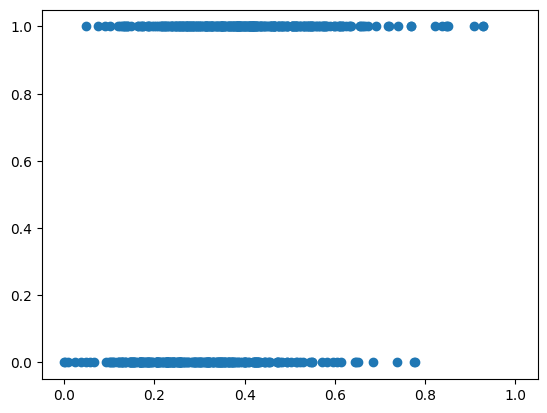

In [19]:
plt.scatter(X_train['BlueBotGoldAt15Minutes'], y_train)
plt.plot(X_test, predictions, color='red', linestyle='None')

In [20]:
noPicks = pd.read_sql('SELECT * FROM MatchData', conn)
noPicks.drop(columns=['BlueTopPick', 'BlueJngPick', 'BlueMidPick', 'BlueBotPick', 'BlueSupPick'], inplace=True)
noPicks.drop(columns=['RedTopPick','RedJngPick', 'RedMidPick', 'RedBotPick', 'RedSupPick'], inplace=True)
noPicks.drop(columns=['MatchID'], inplace=True)

In [21]:
model2 = LogisticRegression(max_iter=100000)

scaler = MinMaxScaler()

norm = pd.DataFrame(scaler.fit_transform(noPicks), columns=noPicks.columns)

X2 = norm.drop(columns=['BlueWin']) # blue win is y hat
y2 = norm['BlueWin']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

# x_train_scaled = scaler.fit_transform(X_train)

model2.fit(X2_train, y2_train)

# x_test_scaled = scaler.transform(X_test)
predictions2 = model2.predict(X2_test)
accuracy2 = accuracy_score(y2_test, predictions2)
print(accuracy2)

0.7671232876712328


This shows that the specific picks do not significantly affect the prediction power of our model. If this is the case, then we can add in data from the rest of the year, as large scale changes affecting early game gold gains happen at the end of the year. 

In [4]:
data = pd.read_csv('completeMatchData.csv')
data

/var/folders/d4/_v_lx6gx66z8htqrwxr89lvc0000gn/T/ipykernel_1031/3540998528.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('completeMatchData.csv')


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,LOLTMNT99_132542,complete,NaN,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,...,207.0,1928.0,1127.0,3.0,4.0,4.0,1.0,1.0,1.0,3.0
1,LOLTMNT99_132542,complete,NaN,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,...,154.0,2943.0,1955.0,0.0,5.0,11.0,1.0,2.0,3.0,2.0
2,LOLTMNT99_132542,complete,NaN,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,...,190.0,660.0,2223.0,18.0,1.0,8.0,3.0,1.0,4.0,3.0
3,LOLTMNT99_132542,complete,NaN,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,...,170.0,5016.0,2473.0,64.0,8.0,7.0,1.0,1.0,4.0,5.0
4,LOLTMNT99_132542,complete,NaN,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,...,31.0,2194.0,3049.0,-6.0,2.0,17.0,1.0,2.0,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98911,LOLTMNT03_163999,complete,NaN,IC,2024,NaN,0,2024-11-11 18:36:23,3,14.21,...,204.0,2204.0,2957.0,44.0,5.0,10.0,3.0,3.0,7.0,5.0
98912,LOLTMNT03_163999,complete,NaN,IC,2024,NaN,0,2024-11-11 18:36:23,3,14.21,...,205.0,-137.0,1265.0,-23.0,6.0,9.0,5.0,4.0,6.0,4.0
98913,LOLTMNT03_163999,complete,NaN,IC,2024,NaN,0,2024-11-11 18:36:23,3,14.21,...,26.0,695.0,984.0,1.0,3.0,13.0,1.0,3.0,11.0,4.0
98914,LOLTMNT03_163999,complete,NaN,IC,2024,NaN,0,2024-11-11 18:36:23,3,14.21,...,711.0,-2156.0,-5817.0,14.0,17.0,37.0,21.0,21.0,45.0,17.0


In [6]:
conn = sqlite3.connect('games.db')
cur = conn.cursor()

# use ints for prediction model
cur.execute('DROP TABLE IF EXISTS FullData')

cur.execute('''CREATE TABLE FullData (
    MatchID INT PRIMARY KEY,
    BlueWin INT,
    BlueTopGoldAt10Minutes INT,
    BlueJngGoldAt10Minutes INT,
    BlueMidGoldAt10Minutes INT,
    BlueBotGoldAt10Minutes INT,
    BlueSupGoldAt10Minutes INT,
    RedTopGoldAt10Minutes INT,
    RedJngGoldAt10Minutes INT,
    RedMidGoldAt10Minutes INT,
    RedBotGoldAt10Minutes INT,
    RedSupGoldAt10Minutes INT,
    BlueTopXPAt10Minutes INT,
    BlueJngXPAt10Minutes INT,
    BlueMidXPAt10Minutes INT,
    BlueBotXPAt10Minutes INT,
    BlueSupXPAt10Minutes INT,
    RedTopXPAt10Minutes INT,
    RedJngXPAt10Minutes INT,
    RedMidXPAt10Minutes INT,
    RedBotXPAt10Minutes INT,
    RedSupXPAt10Minutes INT,
    BlueTurretPlates INT,
    RedTurretPlates INT,
    BlueFirstTurret INT,
    RedFirstTurret INT,
    BlueFirstMidTurret INT,
    RedFirstMidTurret INT,
    BlueVoidGrubs INT,
    RedVoidGrubs INT,
    RedFirstDragon INT,
    BlueFirstDragon INT,
    RedHerald INT,
    BlueHerald INT,
    BlueTopGoldAt15Minutes INT,
    BlueJngGoldAt15Minutes INT,
    BlueMidGoldAt15Minutes INT,
    BlueBotGoldAt15Minutes INT,
    BlueSupGoldAt15Minutes INT,
    RedTopGoldAt15Minutes INT,
    RedJngGoldAt15Minutes INT,
    RedMidGoldAt15Minutes INT,
    RedBotGoldAt15Minutes INT,
    RedSupGoldAt15Minutes INT,
    BlueTopXPAt15Minutes INT,
    BlueJngXPAt15Minutes INT,
    BlueMidXPAt15Minutes INT,
    BlueBotXPAt15Minutes INT,
    BlueSupXPAt15Minutes INT,
    RedTopXPAt15Minutes INT,
    RedJngXPAt15Minutes INT,
    RedMidXPAt15Minutes INT,
    RedBotXPAt15Minutes INT,
    RedSupXPAt15Minutes INT
)''')


In [15]:
# General Match Info
match_id = 0
blue_win = 0

# Gold at 10 Minutes
blue_top_gold_at_10_minutes = 0
blue_jng_gold_at_10_minutes = 0
blue_mid_gold_at_10_minutes = 0
blue_bot_gold_at_10_minutes = 0
blue_sup_gold_at_10_minutes = 0

red_top_gold_at_10_minutes = 0
red_jng_gold_at_10_minutes = 0
red_mid_gold_at_10_minutes = 0
red_bot_gold_at_10_minutes = 0
red_sup_gold_at_10_minutes = 0

# XP at 10 Minutes
blue_top_xp_at_10_minutes = 0
blue_jng_xp_at_10_minutes = 0
blue_mid_xp_at_10_minutes = 0
blue_bot_xp_at_10_minutes = 0
blue_sup_xp_at_10_minutes = 0

red_top_xp_at_10_minutes = 0
red_jng_xp_at_10_minutes = 0
red_mid_xp_at_10_minutes = 0
red_bot_xp_at_10_minutes = 0
red_sup_xp_at_10_minutes = 0

# Turrets
blue_turret_plates = 0
red_turret_plates = 0
blue_first_turret = 0
red_first_turret = 0
blue_first_mid_turret = 0
red_first_mid_turret = 0

# Void Grubs
blue_void_grubs = 0
red_void_grubs = 0

# Objectives
red_first_dragon = 0
blue_first_dragon = 0
red_herald = 0
blue_herald = 0

# Gold at 15 Minutes
blue_top_gold_at_15_minutes = 0
blue_jng_gold_at_15_minutes = 0
blue_mid_gold_at_15_minutes = 0
blue_bot_gold_at_15_minutes = 0
blue_sup_gold_at_15_minutes = 0

red_top_gold_at_15_minutes = 0
red_jng_gold_at_15_minutes = 0
red_mid_gold_at_15_minutes = 0
red_bot_gold_at_15_minutes = 0
red_sup_gold_at_15_minutes = 0

# XP at 15 Minutes
blue_top_xp_at_15_minutes = 0
blue_jng_xp_at_15_minutes = 0
blue_mid_xp_at_15_minutes = 0
blue_bot_xp_at_15_minutes = 0
blue_sup_xp_at_15_minutes = 0

red_top_xp_at_15_minutes = 0
red_jng_xp_at_15_minutes = 0
red_mid_xp_at_15_minutes = 0
red_bot_xp_at_15_minutes = 0
red_sup_xp_at_15_minutes = 0


for index, row in data.iterrows():
    curmatch_id = row['gameid']

    if curmatch_id != match_id:
        # new game to add to database
        if match_id != 0:
            # insert previous game into database
            cur.execute('''INSERT INTO FullData (
            MatchID, BlueWin, BlueTopGoldAt10Minutes, BlueJngGoldAt10Minutes, BlueMidGoldAt10Minutes, 
            BlueBotGoldAt10Minutes, BlueSupGoldAt10Minutes, RedTopGoldAt10Minutes, RedJngGoldAt10Minutes, 
            RedMidGoldAt10Minutes, RedBotGoldAt10Minutes, RedSupGoldAt10Minutes, BlueTopXPAt10Minutes, 
            BlueJngXPAt10Minutes, BlueMidXPAt10Minutes, BlueBotXPAt10Minutes, BlueSupXPAt10Minutes, 
            RedTopXPAt10Minutes, RedJngXPAt10Minutes, RedMidXPAt10Minutes, RedBotXPAt10Minutes, 
            RedSupXPAt10Minutes, BlueTurretPlates, RedTurretPlates, BlueFirstTurret, RedFirstTurret, 
            BlueFirstMidTurret, RedFirstMidTurret, BlueVoidGrubs, RedVoidGrubs, RedFirstDragon, 
            BlueFirstDragon, RedHerald, BlueHerald, BlueTopGoldAt15Minutes, BlueJngGoldAt15Minutes, 
            BlueMidGoldAt15Minutes, BlueBotGoldAt15Minutes, BlueSupGoldAt15Minutes, RedTopGoldAt15Minutes, 
            RedJngGoldAt15Minutes, RedMidGoldAt15Minutes, RedBotGoldAt15Minutes, RedSupGoldAt15Minutes, 
            BlueTopXPAt15Minutes, BlueJngXPAt15Minutes, BlueMidXPAt15Minutes, BlueBotXPAt15Minutes, 
            BlueSupXPAt15Minutes, RedTopXPAt15Minutes, RedJngXPAt15Minutes, RedMidXPAt15Minutes, 
            RedBotXPAt15Minutes, RedSupXPAt15Minutes
        ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''', (
            match_id, blue_win, 
            blue_top_gold_at_10_minutes, blue_jng_gold_at_10_minutes, blue_mid_gold_at_10_minutes, 
            blue_bot_gold_at_10_minutes, blue_sup_gold_at_10_minutes, 
            red_top_gold_at_10_minutes, red_jng_gold_at_10_minutes, red_mid_gold_at_10_minutes, 
            red_bot_gold_at_10_minutes, red_sup_gold_at_10_minutes, 
            blue_top_xp_at_10_minutes, blue_jng_xp_at_10_minutes, blue_mid_xp_at_10_minutes, 
            blue_bot_xp_at_10_minutes, blue_sup_xp_at_10_minutes, 
            red_top_xp_at_10_minutes, red_jng_xp_at_10_minutes, red_mid_xp_at_10_minutes, 
            red_bot_xp_at_10_minutes, red_sup_xp_at_10_minutes, 
            blue_turret_plates, red_turret_plates, blue_first_turret, red_first_turret, 
            blue_first_mid_turret, red_first_mid_turret, blue_void_grubs, red_void_grubs, 
            red_first_dragon, blue_first_dragon, red_herald, blue_herald, 
            blue_top_gold_at_15_minutes, blue_jng_gold_at_15_minutes, blue_mid_gold_at_15_minutes, 
            blue_bot_gold_at_15_minutes, blue_sup_gold_at_15_minutes, 
            red_top_gold_at_15_minutes, red_jng_gold_at_15_minutes, red_mid_gold_at_15_minutes, 
            red_bot_gold_at_15_minutes, red_sup_gold_at_15_minutes, 
            blue_top_xp_at_15_minutes, blue_jng_xp_at_15_minutes, blue_mid_xp_at_15_minutes, 
            blue_bot_xp_at_15_minutes, blue_sup_xp_at_15_minutes, 
            red_top_xp_at_15_minutes, red_jng_xp_at_15_minutes, red_mid_xp_at_15_minutes, 
            red_bot_xp_at_15_minutes, red_sup_xp_at_15_minutes
        ))

            conn.commit()

        match_id = curmatch_id


    if row['side'] == 'Blue':
        if row['position'] == 'top':
            blue_top_gold_at_10_minutes = row['goldat10']
            blue_top_xp_at_10_minutes = row['xpat10']
            blue_top_gold_at_15_minutes = row['goldat15']
            blue_top_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'jng':
            blue_jng_gold_at_10_minutes = row['goldat10']
            blue_jng_xp_at_10_minutes = row['xpat10']
            blue_jng_gold_at_15_minutes = row['goldat15']
            blue_jng_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'mid':
            blue_mid_gold_at_10_minutes = row['goldat10']
            blue_mid_xp_at_10_minutes = row['xpat10']
            blue_mid_gold_at_15_minutes = row['goldat15']
            blue_mid_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'bot':
            blue_bot_pick = row['champion']
            blue_bot_gold_at_10_minutes = row['goldat10']
            blue_bot_xp_at_10_minutes = row['xpat10']
            blue_bot_gold_at_15_minutes = row['goldat15']
            blue_bot_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'sup':
            blue_sup_gold_at_10_minutes = row['goldat10']
            blue_sup_xp_at_10_minutes = row['xpat10']
            blue_sup_gold_at_15_minutes = row['goldat15']
            blue_sup_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'team':
            blue_win = int(row['result'])
            blue_turret_plates = row['turretplates']
            blue_first_turret = row['firsttower']
            blue_first_mid_turret = row['firsttower']
            blue_void_grubs = row['void_grubs']
            blue_first_dragon = row['firstdragon']
            blue_herald = row['heralds']
    elif row['side'] == 'Red':
        if row['position'] == 'top':
            red_top_gold_at_10_minutes = row['goldat10']
            red_top_xp_at_10_minutes = row['xpat10']
            red_top_gold_at_15_minutes = row['goldat15']
            red_top_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'jng':
            red_jng_pick = row['champion']
            red_jng_gold_at_10_minutes = row['goldat10']
            red_jng_xp_at_10_minutes = row['xpat10']
            red_jng_gold_at_15_minutes = row['goldat15']
            red_jng_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'mid':
            red_mid_gold_at_10_minutes = row['goldat10']
            red_mid_xp_at_10_minutes = row['xpat10']
            red_mid_gold_at_15_minutes = row['goldat15']
            red_mid_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'bot':
            red_bot_gold_at_10_minutes = row['goldat10']
            red_bot_xp_at_10_minutes = row['xpat10']
            red_bot_gold_at_15_minutes = row['goldat15']
            red_bot_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'sup':
            red_sup_gold_at_10_minutes = row['goldat10']
            red_sup_xp_at_10_minutes = row['xpat10']
            red_sup_gold_at_15_minutes = row['goldat15']
            red_sup_xp_at_15_minutes = row['xpat15']
        elif row['position'] == 'team':
            red_turret_plates = row['turretplates']
            red_first_turret = row['firsttower']
            red_first_mid_turret = row['firsttower']
            red_void_grubs = row['void_grubs']
            red_first_dragon = row['firstdragon']
            red_herald = row['heralds']

In [28]:
model3 = LogisticRegression(max_iter=100000)
fullData = pd.read_sql('SELECT * FROM FullData', conn)
fullData.drop(columns=['MatchID'], inplace=True)
fullData.dropna(inplace=True) # 2 rows became NaN for some reason

scaler = MinMaxScaler()

norm = pd.DataFrame(scaler.fit_transform(fullData), columns=fullData.columns)

X3 = norm.drop(columns=['BlueWin']) # blue win is y hat
y3 = norm['BlueWin']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2)

# x_train_scaled = scaler.fit_transform(X_train)

model3.fit(X3_train, y3_train)

# x_test_scaled = scaler.transform(X_test)
predictions3 = model3.predict(X3_test)
accuracy3 = accuracy_score(y3_test, predictions3)
print(accuracy3)

0.7311893203883495


Interestingly we get worse results when providing more data.

In [30]:
# Combine the columns into gold diff and xp diff columns

fullData['TopGoldDiffAt10Minutes'] = fullData['BlueTopGoldAt10Minutes'] - fullData['RedTopGoldAt10Minutes']
fullData['JngGoldDiffAt10Minutes'] = fullData['BlueJngGoldAt10Minutes'] - fullData['RedJngGoldAt10Minutes']
fullData['MidGoldDiffAt10Minutes'] = fullData['BlueMidGoldAt10Minutes'] - fullData['RedMidGoldAt10Minutes']
fullData['BotGoldDiffAt10Minutes'] = fullData['BlueBotGoldAt10Minutes'] - fullData['RedBotGoldAt10Minutes']
fullData['SupGoldDiffAt10Minutes'] = fullData['BlueSupGoldAt10Minutes'] - fullData['RedSupGoldAt10Minutes']

fullData['TopXpDiffAt10Minutes'] = fullData['BlueTopXPAt10Minutes'] - fullData['RedTopXPAt10Minutes']
fullData['JngXpDiffAt10Minutes'] = fullData['BlueJngXPAt10Minutes'] - fullData['RedJngXPAt10Minutes']
fullData['MidXpDiffAt10Minutes'] = fullData['BlueMidXPAt10Minutes'] - fullData['RedMidXPAt10Minutes']
fullData['BotXpDiffAt10Minutes'] = fullData['BlueBotXPAt10Minutes'] - fullData['RedBotXPAt10Minutes']
fullData['SupXpDiffAt10Minutes'] = fullData['BlueSupXPAt10Minutes'] - fullData['RedSupXPAt10Minutes']

fullData['TopGoldDiffAt15Minutes'] = fullData['BlueTopGoldAt15Minutes'] - fullData['RedTopGoldAt15Minutes']
fullData['JngGoldDiffAt15Minutes'] = fullData['BlueJngGoldAt15Minutes'] - fullData['RedJngGoldAt15Minutes']
fullData['MidGoldDiffAt15Minutes'] = fullData['BlueMidGoldAt15Minutes'] - fullData['RedMidGoldAt15Minutes']
fullData['BotGoldDiffAt15Minutes'] = fullData['BlueBotGoldAt15Minutes'] - fullData['RedBotGoldAt15Minutes']
fullData['SupGoldDiffAt15Minutes'] = fullData['BlueSupGoldAt15Minutes'] - fullData['RedSupGoldAt15Minutes']

fullData['TopXpDiffAt15Minutes'] = fullData['BlueTopXPAt15Minutes'] - fullData['RedTopXPAt15Minutes']
fullData['JngXpDiffAt15Minutes'] = fullData['BlueJngXPAt15Minutes'] - fullData['RedJngXPAt15Minutes']
fullData['MidXpDiffAt15Minutes'] = fullData['BlueMidXPAt15Minutes'] - fullData['RedMidXPAt15Minutes']
fullData['BotXpDiffAt15Minutes'] = fullData['BlueBotXPAt15Minutes'] - fullData['RedBotXPAt15Minutes']
fullData['SupXpDiffAt15Minutes'] = fullData['BlueSupXPAt15Minutes'] - fullData['RedSupXPAt15Minutes']

# drop the old columns

fullData.drop(['BlueTopGoldAt10Minutes', 'BlueJngGoldAt10Minutes', 'BlueMidGoldAt10Minutes', 'BlueBotGoldAt10Minutes', 'BlueSupGoldAt10Minutes',
    'RedTopGoldAt10Minutes', 'RedJngGoldAt10Minutes', 'RedMidGoldAt10Minutes', 'RedBotGoldAt10Minutes', 'RedSupGoldAt10Minutes',
    'BlueTopXPAt10Minutes', 'BlueJngXPAt10Minutes', 'BlueMidXPAt10Minutes', 'BlueBotXPAt10Minutes', 'BlueSupXPAt10Minutes',
    'RedTopXPAt10Minutes', 'RedJngXPAt10Minutes', 'RedMidXPAt10Minutes', 'RedBotXPAt10Minutes', 'RedSupXPAt10Minutes',
    'BlueTopGoldAt15Minutes', 'BlueJngGoldAt15Minutes', 'BlueMidGoldAt15Minutes', 'BlueBotGoldAt15Minutes', 'BlueSupGoldAt15Minutes',
    'RedTopGoldAt15Minutes', 'RedJngGoldAt15Minutes', 'RedMidGoldAt15Minutes', 'RedBotGoldAt15Minutes', 'RedSupGoldAt15Minutes',
    'BlueTopXPAt15Minutes', 'BlueJngXPAt15Minutes', 'BlueMidXPAt15Minutes', 'BlueBotXPAt15Minutes', 'BlueSupXPAt15Minutes',
    'RedTopXPAt15Minutes', 'RedJngXPAt15Minutes', 'RedMidXPAt15Minutes', 'RedBotXPAt15Minutes', 'RedSupXPAt15Minutes'
], inplace=True, axis=1)

fullData

,BlueWin,BlueTurretPlates,RedTurretPlates,BlueFirstTurret,RedFirstTurret,BlueFirstMidTurret,RedFirstMidTurret,BlueVoidGrubs,RedVoidGrubs,RedFirstDragon,...,TopGoldDiffAt15Minutes,JngGoldDiffAt15Minutes,MidGoldDiffAt15Minutes,BotGoldDiffAt15Minutes,SupGoldDiffAt15Minutes,TopXpDiffAt15Minutes,JngXpDiffAt15Minutes,MidXpDiffAt15Minutes,BotXpDiffAt15Minutes,SupXpDiffAt15Minutes
0,1,8,5,1,0,1,0,0,6,0,...,-575.0,236.0,-409.0,2811.0,230.0,-603.0,-107.0,39.0,1047.0,573.0
1,1,1,8,0,1,0,1,4,2,1,...,-1929.0,928.0,552.0,-78.0,452.0,-547.0,1950.0,464.0,-600.0,-175.0
2,1,1,3,0,1,0,1,2,4,0,...,432.0,-752.0,373.0,-291.0,-323.0,1177.0,266.0,-192.0,-708.0,-133.0
3,1,6,6,1,0,1,0,3,3,1,...,-96.0,1139.0,789.0,696.0,332.0,4.0,668.0,518.0,126.0,-117.0
4,0,7,3,1,0,1,0,3,3,0,...,-171.0,-944.0,-616.0,885.0,254.0,-818.0,-556.0,-278.0,305.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8237,0,7,9,0,1,0,1,0,6,1,...,-1924.0,532.0,664.0,-246.0,-507.0,-1859.0,1201.0,752.0,-523.0,-147.0
8238,1,5,3,1,0,1,0,5,1,1,...,22.0,-140.0,1292.0,268.0,173.0,197.0,-454.0,-510.0,543.0,-364.0
8239,0,3,11,0,1,0,1,6,0,1,...,-389.0,-94.0,-838.0,-2668.0,-968.0,192.0,-84.0,-1599.0,-357.0,-1005.0
8240,0,3,3,1,0,1,0,3,3,1,...,231.0,-436.0,-428.0,-695.0,16.0,602.0,-149.0,-1146.0,-84.0,-597.0


In [31]:
model4 = LogisticRegression(max_iter=100000)
fullData.dropna(inplace=True) # in case we got any NaNs again

scaler = MinMaxScaler()

norm = pd.DataFrame(scaler.fit_transform(fullData), columns=fullData.columns)

X4 = norm.drop(columns=['BlueWin']) # blue win is y hat
y4 = norm['BlueWin']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2)

# x_train_scaled = scaler.fit_transform(X_train)

model4.fit(X4_train, y4_train)

# x_test_scaled = scaler.transform(X_test)
predictions4 = model4.predict(X4_test)
accuracy4 = accuracy_score(y4_test, predictions4)
print(accuracy4)

0.7372572815533981


Seperating the teams doesn't change the prediction power, lets see if combining it to make it teamwide does anything

In [32]:
# combine the columns into gold diff and xp diff columns by team instead of by role

fullData['GoldDiffAt10Minutes'] = fullData['TopGoldDiffAt10Minutes'] + fullData['JngGoldDiffAt10Minutes'] + fullData['MidGoldDiffAt10Minutes'] + fullData['BotGoldDiffAt10Minutes'] + fullData['SupGoldDiffAt10Minutes']
fullData['GoldDiffAt15Minutes'] = fullData['TopGoldDiffAt15Minutes'] + fullData['JngGoldDiffAt15Minutes'] + fullData['MidGoldDiffAt15Minutes'] + fullData['BotGoldDiffAt15Minutes'] + fullData['SupGoldDiffAt15Minutes']

fullData['XpDiffAt10Minutes'] = fullData['TopXpDiffAt10Minutes'] + fullData['JngXpDiffAt10Minutes'] + fullData['MidXpDiffAt10Minutes'] + fullData['BotXpDiffAt10Minutes'] + fullData['SupXpDiffAt10Minutes']
fullData['XpDiffAt15Minutes'] = fullData['TopXpDiffAt15Minutes'] + fullData['JngXpDiffAt15Minutes'] + fullData['MidXpDiffAt15Minutes'] + fullData['BotXpDiffAt15Minutes'] + fullData['SupXpDiffAt15Minutes']

fullData.drop(columns=[
    'TopGoldDiffAt10Minutes', 'JngGoldDiffAt10Minutes', 'MidGoldDiffAt10Minutes', 'BotGoldDiffAt10Minutes', 'SupGoldDiffAt10Minutes',
    'TopGoldDiffAt15Minutes', 'JngGoldDiffAt15Minutes', 'MidGoldDiffAt15Minutes', 'BotGoldDiffAt15Minutes', 'SupGoldDiffAt15Minutes',
    'TopXpDiffAt10Minutes', 'JngXpDiffAt10Minutes', 'MidXpDiffAt10Minutes', 'BotXpDiffAt10Minutes', 'SupXpDiffAt10Minutes',
    'TopXpDiffAt15Minutes', 'JngXpDiffAt15Minutes', 'MidXpDiffAt15Minutes', 'BotXpDiffAt15Minutes', 'SupXpDiffAt15Minutes'
], inplace=True)

fullData

,BlueWin,BlueTurretPlates,RedTurretPlates,BlueFirstTurret,RedFirstTurret,BlueFirstMidTurret,RedFirstMidTurret,BlueVoidGrubs,RedVoidGrubs,RedFirstDragon,BlueFirstDragon,RedHerald,BlueHerald,GoldDiffAt10Minutes,GoldDiffAt15Minutes,XpDiffAt10Minutes,XpDiffAt15Minutes
0,1,8,5,1,0,1,0,0,6,0,1,0,1,1364.0,2293.0,557.0,949.0
1,1,1,8,0,1,0,1,4,2,1,0,1,0,-88.0,-75.0,625.0,1092.0
2,1,1,3,0,1,0,1,2,4,0,1,0,1,-2583.0,-561.0,-1718.0,410.0
3,1,6,6,1,0,1,0,3,3,1,0,1,0,1260.0,2860.0,512.0,1199.0
4,0,7,3,1,0,1,0,3,3,0,1,1,0,-1191.0,-592.0,-963.0,-1346.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8237,0,7,9,0,1,0,1,0,6,1,0,0,1,-343.0,-1481.0,753.0,-576.0
8238,1,5,3,1,0,1,0,5,1,1,0,0,1,1554.0,1615.0,158.0,-588.0
8239,0,3,11,0,1,0,1,6,0,1,0,1,0,-2014.0,-4957.0,-1516.0,-2853.0
8240,0,3,3,1,0,1,0,3,3,1,0,1,0,-702.0,-1312.0,-882.0,-1374.0


In [33]:
model5 = LogisticRegression(max_iter=100000)
fullData.dropna(inplace=True) # in case we got any NaNs again

scaler = MinMaxScaler()

norm = pd.DataFrame(scaler.fit_transform(fullData), columns=fullData.columns)

X5 = norm.drop(columns=['BlueWin']) # blue win is y hat
y5 = norm['BlueWin']

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2)

# x_train_scaled = scaler.fit_transform(X_train)

model5.fit(X5_train, y5_train)

# x_test_scaled = scaler.transform(X_test)
predictions5 = model5.predict(X5_test)
accuracy5 = accuracy_score(y5_test, predictions5)
print(accuracy5)

0.7360436893203883


This result allows us to infer that seperating the gold into each position does not change the predictive power meaningfully. This means that in professional league of legends games, the gold advantages gained does not meaningfully change the result depending on who gets the gold. A problem with this inference however is that many teams will often give gold leads to the bot lane player.

Lets see the prediction power of adding the full game's data

We need:

- Result
- Game Length
- Kills
- Deaths
- Assists
- Double Kills
- Triple Kills
- Quadra Kills
- Penta Kills
- First Blood
- First Dragon
- Infernal Dragons
- Mountain Dragons
- Cloud Dragons
- Ocean Dragons
- Chemtech Dragons
- Hextech Dragons
- Elder Dragons
- Herald
- Void Grubs
- First Baron
- Barons
- First Tower
- Towers <- this may have too much predictive power
- First Mid Tower
- Turret Plates
- Inhibitors
- Damage to Champions
- Damage taken per minute
- Wards Placed
- Wards Killed
- Total Gold
- Minion Kills
- Monster Kills
- Gold At 10
- XP At 10
- Last 2 for each interval of 5 till 25

Lets cut this down to some variables that don't overlap or don't provide as much predictive power.

- Result
- Game Length
- Kills
- Deaths
- First Blood
- First Dragon
- Dragons
- Elder
- First Baron
- Baron
- Herald
- Grubs
- Towers
- Inhibitors
- First Tower
- Turret Plates
- Damage to Champions
- Total Gold
- Monster Kills

In [16]:
data = pd.read_csv('completeMatchData.csv')

conn = sqlite3.connect('games.db')

cur = conn.cursor()

cur.execute('DROP TABLE IF EXISTS CompleteGameData')

cur.execute('''CREATE TABLE CompleteGameData (
            Result INT,
            GameLength INT,
            Kills INT,
            Deaths INT,
            FirstBlood INT,
            Dragons INT,
            ElderDragons INT,
            Herald INT,
            Barons INT,
            Turrets INT,
            Inhibitors INT,
            FirstTurret INT,
            TurretPlates INT,
            FirstDragon INT,
            VoidGrubs INT,
            FirstBaron INT,
            TotalGold INT,
            MonsterKills INT,
            MinionKills INT,
            DamageDealt INT,
            RedDragons INT,
            RedElderDragons INT,
            RedBarons INT,
            RedTurrets INT,
            RedInhibitors INT,
            RedTurretPlates INT,
            RedVoidGrubs INT,
            RedTotalGold INT,
            RedMonsterKills INT,
            RedMinionKills INT,
            RedDamageDealt INT
)''')

/var/folders/d4/_v_lx6gx66z8htqrwxr89lvc0000gn/T/ipykernel_35419/2277504969.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('completeMatchData.csv')


In [7]:
data.to_sql('OriginalDataSet', conn, index=False)

98916

In [24]:
data = pd.read_sql('SELECT * FROM OriginalDataSet WHERE position = \'team\'', conn)
data

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,LOLTMNT99_132542,complete,None,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,...,752.0,12741.0,10827.0,79.0,20.0,47.0,7.0,7.0,14.0,20.0
1,LOLTMNT99_132542,complete,None,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,...,831.0,-12741.0,-10827.0,-79.0,7.0,14.0,20.0,20.0,47.0,7.0
2,LOLTMNT99_132665,complete,None,TSC,2024,Winter,0,2024-01-05 15:03:35,1,14.01,...,825.0,1459.0,3393.0,25.0,17.0,28.0,11.0,11.0,15.0,17.0
3,LOLTMNT99_132665,complete,None,TSC,2024,Winter,0,2024-01-05 15:03:35,1,14.01,...,850.0,-1459.0,-3393.0,-25.0,11.0,15.0,17.0,17.0,28.0,11.0
4,LOLTMNT99_132755,complete,None,TSC,2024,Winter,0,2024-01-05 16:10:07,1,14.01,...,854.0,1092.0,2266.0,-32.0,10.0,19.0,7.0,7.0,11.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16481,LOLTMNT03_164750,complete,None,IC,2024,None,0,2024-11-11 17:05:57,1,14.21,...,832.0,5734.0,7163.0,-7.0,11.0,25.0,3.0,3.0,8.0,11.0
16482,LOLTMNT03_164762,complete,None,IC,2024,None,0,2024-11-11 17:51:34,2,14.21,...,801.0,-7087.0,-10932.0,-46.0,12.0,20.0,21.0,21.0,48.0,12.0
16483,LOLTMNT03_164762,complete,None,IC,2024,None,0,2024-11-11 17:51:34,2,14.21,...,755.0,7087.0,10932.0,46.0,21.0,48.0,12.0,12.0,20.0,21.0
16484,LOLTMNT03_163999,complete,None,IC,2024,None,0,2024-11-11 18:36:23,3,14.21,...,711.0,-2156.0,-5817.0,14.0,17.0,37.0,21.0,21.0,45.0,17.0


In [25]:
# Initialize variables with default values (e.g., 0 or None)
result = 0
game_length = 0
kills = 0
deaths = 0
first_blood = 0
dragons = 0
elder_dragons = 0
herald = 0
barons = 0
turrets = 0
inhibitors = 0
first_turret = 0
turret_plates = 0
first_dragon = 0
void_grubs = 0
first_baron = 0
total_gold = 0
monster_kills = 0
minion_kills = 0
damage_dealt = 0

for index, row in data.iterrows():
    if index % 2 == 0:
        # blue 
        result = row['result']
        game_length = row['gamelength']
        kills = row['kills']
        deaths = row['deaths']
        first_blood = row['firstblood']
        dragons = row['dragons']
        elder_dragons = row['elders']
        herald = row['heralds']
        barons = row['barons']
        turrets = row['towers']
        inhibitors = row['inhibitors']
        first_turret = row['firsttower']
        turret_plates = row['turretplates']
        first_dragon = row['firstdragon']
        void_grubs = row['void_grubs']
        first_baron = row['firstbaron']
        total_gold = row['totalgold']
        monster_kills = row['monsterkills']
        minion_kills = row['monsterkills']
        damage_dealt = row['damagetochampions']
    else:
        # red 
        red_dragons = row['dragons']
        red_elder_dragons = row['elders']
        red_barons = row['barons']
        red_turrets = row['towers']
        red_inhibitors = row['inhibitors']
        red_turret_plates = row['turretplates']
        red_void_grubs = row['void_grubs']
        red_total_gold = row['totalgold']
        red_monster_kills = row['monsterkills']
        red_minion_kills = row['monsterkills']
        red_damage_dealt = row['damagetochampions']

        cur.execute('''INSERT INTO CompleteGameData (
            Result, GameLength, Kills, Deaths, FirstBlood, Dragons, ElderDragons, Herald, Barons, Turrets, Inhibitors, FirstTurret, TurretPlates, 
            FirstDragon, VoidGrubs, FirstBaron, TotalGold, MonsterKills, MinionKills, DamageDealt, RedDragons, RedElderDragons, RedBarons, RedTurrets, 
            RedInhibitors, RedTurretPlates, RedVoidGrubs, RedTotalGold, RedMonsterKills, RedMinionKills, RedDamageDealt) 
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''', (
            result, game_length, kills, deaths, first_blood, dragons, elder_dragons, herald, barons, turrets, inhibitors, first_turret, turret_plates,
            first_dragon, void_grubs, first_baron, total_gold, monster_kills, minion_kills, damage_dealt, red_dragons, red_elder_dragons, red_barons, 
            red_turrets, red_inhibitors, red_turret_plates, red_void_grubs, red_total_gold, red_monster_kills, red_minion_kills, red_damage_dealt
        ))


        conn.commit()


In [28]:
cur.execute('DROP TABLE IF EXISTS CompleteGameData')

fullData.dropna(inplace=True) # # remove the player rows and leave just the team ones

fullData.to_sql('CompleteGameData', conn, index=False)

24729

In [26]:
fullData = pd.read_sql('SELECT * FROM CompleteGameData', conn)

model6 = LogisticRegression(max_iter=100000)
fullData.dropna(inplace=True) # remove the player rows and leave just the team ones

scaler = MinMaxScaler()

norm = pd.DataFrame(scaler.fit_transform(fullData), columns=fullData.columns)

X6 = norm.drop(columns=['Result']) # blue win is y hat
y6 = norm['Result']

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2)

# x_train_scaled = scaler.fit_transform(X_train)

model6.fit(X6_train, y6_train)

# x_test_scaled = scaler.transform(X_test)
predictions6 = model6.predict(X6_test)
accuracy6 = accuracy_score(y6_test, predictions6)
print(accuracy6)

0.9852405984634047


As we can see, the predictive power goes up much more when we give it more data than just the first 15 minutes. However, I suspect that a lot of the power comes from the tower numbers, as you do have to take at least 5 towers and an inhibitor to win the game. Lets see what happens if we drop them.

In [30]:
fullData = pd.read_sql('SELECT * FROM CompleteGameData', conn)
fullData.drop(columns=['Turrets', 'Inhibitors', 'RedTurrets', 'RedInhibitors'], inplace=True)

model7 = LogisticRegression(max_iter=100000)
fullData.dropna(inplace=True) # remove the player rows and leave just the team ones

scaler = MinMaxScaler()

norm = pd.DataFrame(scaler.fit_transform(fullData), columns=fullData.columns)

X7 = norm.drop(columns=['Result']) # blue win is y hat
y7 = norm['Result']

X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2)

# x_train_scaled = scaler.fit_transform(X_train)

model7.fit(X7_train, y7_train)

# x_test_scaled = scaler.transform(X_test)
predictions7 = model7.predict(X7_test)
accuracy7 = accuracy_score(y7_test, predictions7)
print(accuracy7)

0.9747270521633643


The predictive power only very slightly decreased. Lets make a correlation matrix to see what the biggest factors are. 

In [33]:
fullData = pd.read_sql('SELECT * FROM CompleteGameData', conn)

fullData.corr()

,Result,GameLength,Kills,Deaths,FirstBlood,Dragons,ElderDragons,Herald,Barons,Turrets,...,RedElderDragons,RedBarons,RedTurrets,RedInhibitors,RedTurretPlates,RedVoidGrubs,RedTotalGold,RedMonsterKills,RedMinionKills,RedDamageDealt
Result,1.000000,-0.036757,0.642034,-0.682391,0.186362,0.529437,0.100013,0.259176,0.596755,0.884977,...,-0.173215,-0.629689,-0.892292,-0.756720,-0.289580,-0.146481,-0.453557,-0.339428,-0.339428,-0.359143
GameLength,-0.036757,1.000000,0.175697,0.211882,-0.026378,0.372955,0.293549,-0.002730,0.338690,0.136012,...,0.311929,0.371130,0.216750,0.176684,-0.083614,0.009353,0.870006,0.749495,0.749495,0.694308
Kills,0.642034,0.175697,1.000000,-0.182094,0.199457,0.454889,0.112424,0.218671,0.510660,0.687906,...,-0.029155,-0.337010,-0.565397,-0.451139,-0.154695,-0.109248,-0.087957,-0.148025,-0.148025,0.122223
Deaths,-0.682391,0.211882,-0.182094,1.000000,-0.201016,-0.401095,0.005245,-0.237832,-0.350661,-0.611188,...,0.155837,0.551746,0.722458,0.598941,0.306440,0.108697,0.592030,0.338904,0.338904,0.665304
FirstBlood,0.186362,-0.026378,0.199457,-0.201016,1.000000,0.159500,-0.015548,0.155032,0.124048,0.203139,...,-0.041223,-0.138675,-0.209348,-0.162417,-0.171982,-0.090068,-0.131724,-0.090487,-0.090487,-0.092136
Dragons,0.529437,0.372955,0.454889,-0.401095,0.159500,1.000000,0.257111,0.196584,0.469997,0.570638,...,-0.077715,-0.215395,-0.438731,-0.367663,-0.243900,0.037557,0.057058,0.065791,0.065791,0.010246
ElderDragons,0.100013,0.293549,0.112424,0.005245,-0.015548,0.257111,1.000000,0.000294,0.175139,0.121165,...,0.090415,0.058251,-0.010498,0.006029,-0.018872,0.018995,0.216285,0.197893,0.197893,0.196375
Herald,0.259176,-0.002730,0.218671,-0.237832,0.155032,0.196584,0.000294,1.000000,0.180699,0.313587,...,-0.023724,-0.184664,-0.307726,-0.240232,-0.221809,-0.144328,-0.143084,-0.119983,-0.119983,-0.107627
Barons,0.596755,0.338690,0.510660,-0.350661,0.124048,0.469997,0.175139,0.180699,1.000000,0.689662,...,0.027978,-0.526363,-0.516540,-0.459090,-0.194118,-0.081601,0.016897,0.034523,0.034523,0.039144
Turrets,0.884977,0.136012,0.687906,-0.611188,0.203139,0.570638,0.121165,0.313587,0.689662,1.000000,...,-0.069287,-0.554273,-0.827261,-0.689176,-0.349180,-0.206457,-0.286137,-0.240791,-0.240791,-0.209903


Biggest contributors are kills, deaths, dragons, turrets, barons, inhibitors. 